In [1]:
# Import dependencies
import requests
import pprint
import pandas as pd
import json
import os
import csv
from pymongo import MongoClient
from pprint import pprint

## Property Listings Data

In [2]:
# Parameters for getting all the Property data from Houski Api
params = {}
params['api_key'] = '698c8c20-7e89-4f9b-a8c0-ac7fd9d76313'
params['city'] = 'toronto'
params['country_abbreviation'] = 'ca'
params['province_abbreviation'] = 'on'
params['results_per_page'] = '370'
params['select'] = 'address,latitude,longitude,city,province,postal_code,direction_facing,den,list_price,estimate_list_price,property_taxes,land_area_sq_m,interior_sq_m,bedroom,bathroom_full,bathroom_half,construction_year,property_taxes,score_education,score_food_and_drink,score_bicycle,score_entertainment,score_safety,score_shopping,score_traffic,score_transit,score_walkability'

# Make the API request
response = requests.get('https://api.houski.ca/properties', params=params)

# Extract the json result
if response.status_code == 200:
    json_data = response.json()
    pprint(json_data)
else:
    print(f'Failed to get data: {response}')

{'cache_hit': False,
 'cost_cents': 965.6998901367188,
 'data': [{'address': '227 Old Forest Hill Road',
           'bathroom_full': 2,
           'bathroom_half': 0,
           'bedroom': 6,
           'city': 'Toronto',
           'construction_year': 1978,
           'den': 1,
           'direction_facing': 'South',
           'estimate_list_price': 904014,
           'interior_sq_m': 104.58000183105469,
           'latitude': 43.70151138305664,
           'longitude': -79.43286895751953,
           'postal_code': 'M5P2R5',
           'property_id': '409d2421dde3d345',
           'province': 'Ontario',
           'score_bicycle': 9,
           'score_education': 9,
           'score_entertainment': 7,
           'score_food_and_drink': 10,
           'score_safety': 10,
           'score_shopping': 10,
           'score_traffic': 10,
           'score_transit': 9,
           'score_walkability': 9},
          {'address': '150 Old Forest Hill Road',
           'bathroom_full': 2,
   

In [3]:
# Extract the data from Json
Property_data=json_data["data"]
print(Property_data)

[{'address': '227 Old Forest Hill Road', 'bathroom_full': 2, 'bathroom_half': 0, 'bedroom': 6, 'city': 'Toronto', 'construction_year': 1978, 'den': 1, 'direction_facing': 'South', 'estimate_list_price': 904014, 'interior_sq_m': 104.58000183105469, 'latitude': 43.70151138305664, 'longitude': -79.43286895751953, 'postal_code': 'M5P2R5', 'property_id': '409d2421dde3d345', 'province': 'Ontario', 'score_bicycle': 9, 'score_education': 9, 'score_entertainment': 7, 'score_food_and_drink': 10, 'score_safety': 10, 'score_shopping': 10, 'score_traffic': 10, 'score_transit': 9, 'score_walkability': 9}, {'address': '150 Old Forest Hill Road', 'bathroom_full': 2, 'bathroom_half': 0, 'bedroom': 6, 'city': 'Toronto', 'construction_year': 1978, 'den': 1, 'direction_facing': 'South', 'estimate_list_price': 879095, 'interior_sq_m': 104.58000183105469, 'latitude': 43.702110290527344, 'longitude': -79.4246826171875, 'postal_code': 'M5P2R5', 'property_id': '8b2a9b4ab2f79b12', 'province': 'Ontario', 'score_

In [4]:
# Step 1: Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')

# Create the Database in Mongo Db
db = client['real_estate_project_db']  

# Create the collection in MongoDB
collection = db['property_listings_info'] 

input_json_path = os.path.join('Resources', 'data.json')
# Step 2: Load JSON data
with open(input_json_path, 'r') as file:
    file_data = json.load(file)

# Step 3: Insert data into the collection
# If file_data is a list of dictionaries
if isinstance(file_data, list):
    collection.insert_many(file_data)
else:
    collection.insert_one(file_data)

# Close the connection
client.close()

## Toronto Schools Data

In [5]:
# Step 1: Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')

# Create the Database in Mongo Db
db = client['real_estate_project_db']  

# Create the collection in MongoDB
collection = db['schools_info'] 

input_json_path = os.path.join('Resources', 'toronto-schools.json')
# Step 2: Load JSON data
with open(input_json_path, 'r') as file:
    file_data = json.load(file)

# Step 3: Insert data into the collection
# If file_data is a list of dictionaries
if isinstance(file_data, list):
    collection.insert_many(file_data)
else:
    collection.insert_one(file_data)

# Close the connection
client.close()

In [6]:
# Connect to MongoDB client and list database names to identify the database to be exported to
mongo = MongoClient(port=27017)
print(mongo.list_database_names())

['admin', 'ajunjee_db', 'autosaurus_db', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'mydb', 'petsitly_marketing', 'real_estate_project_db', 'uk_food']


In [7]:
# assign the database to a variable name
db = mongo['real_estate_project_db']  

In [8]:
# review the collections in our new database
print(db.list_collection_names())

['property_listings_info', 'schools_info']


In [9]:
# review a document in the collection
print(db.schools_info.find_one())

{'_id': 2, 'OBJECTID': 2, 'GEO_ID': 524780, 'NAME': 'A R S ARMENIAN PRIVATE SCHOOL', 'SOURCE_ADDRESS': '50 HALLCROWN PL', 'SCHOOL_TYPE_DESC': 'Private', 'ADDRESS_POINT_ID': 524780, 'LINEAR_NAME_FULL': 'Hallcrown Pl', 'ADDRESS_FULL': '50 Hallcrown Pl', 'POSTAL_CODE': 'M2J 1P7', 'MUNICIPALITY': 'North York', 'CITY': 'Toronto', 'GENERAL_USE_CODE': 104008, 'LONG': -79.323156147744, 'LAT': 43.770053062482}


## Subway Stations Data

In [10]:
# Set the column width
pd.options.display.max_colwidth = 200

# Read the dataset and store as pandas dataframe. 
stations = pd.read_excel("Resources/TTC Subway Stations.xlsx")
stations.head()

,ID,Station,Category,Address,CITY,Postal Code,Line,Grade,Ridership (2019[9] avg. weekday),Parking spaces[10],...,LAT min,LAT seconds,LAT direction,LAT decimal,LON,LON degree,LON min,LON seconds,LON direction,LON decimal
0,1,Finch,TTC Subway Station,5600 Yonge Street,North York,M2N 5S2,1,Underground,102025,"3,227[13]",...,46,50.0,N,43.780556,79°24?53?W,79,24,53.0,W,79.414722
1,2,North York Centre,TTC Subway Station,5102 Yonge Street,North York,M2N 6L8,1,Underground,31471,0,...,46,6.0,N,43.768333,79°24?46?W,79,24,46.0,W,79.412778
2,3,Sheppard–Yonge,TTC Subway Station,20 Sheppard Avenue West,North York,M2N 5M9,"1,4",Underground,134076,0,...,45,41.0,N,43.761389,79°24?39?W,79,24,39.0,W,79.410833
3,4,York Mills,TTC Subway Station,4015 Yonge Street,North York,M5M 3G1,1,Underground,28461,0,...,44,39.0,N,43.744167,79°24?24?W,79,24,24.0,W,79.406667
4,5,Lawrence,TTC Subway Station,3101 Yonge Street,Toronto,M4N 3N1,1,Underground,28041,0,...,43,30.0,N,43.725000,79°24?8?W,79,24,8.0,W,79.402222


In [11]:
# Rename columns
stations.rename(columns={'CITY': "City",
                            'Ridership (2019[9] avg. weekday)': "Ridership_Weekly_Average",
                            'Parking spaces[10]': "Parking_Spaces",
                            'Accessible[12]': "Accessibility",
                            'Postal Code': 'Postal_code',
                            'LAT': 'LAT coordinate',
                            'LON': 'LON coordinate',
                            'LAT decimal': "LAT",
                            'LON decimal': "LON"}, inplace=True)

# Update station name to include 'TTC Subway Station' so 'Category' column can be removed
stations['Station'] = stations['Station'] + ' TTC Subway Station'

# Create new column to include province
stations['Province'] = 'Ontario'

In [12]:
# Trim the reference info from the parking space count
stations['Parking_Spaces'] = stations['Parking_Spaces'].str[:-4]

# Remove comma from the parking space count to prepare for integer conversion
# Fill in the NAN columns with 0 values instead
# Convert parking space count to integer
stations['Parking_Spaces'] = stations['Parking_Spaces'].str.replace(",","").fillna(0).astype(int)

# Confrm columns have been cleaned and identify the necessary ones only for export to mongodb
stations.dtypes


ID                            int64
Station                      object
Category                     object
Address                      object
City                         object
Postal_code                  object
Line                         object
Grade                        object
Ridership_Weekly_Average      int64
Parking_Spaces                int32
Accessibility                object
LAT coordinate               object
LAT degree                    int64
LAT min                       int64
LAT seconds                 float64
LAT direction                object
LAT                         float64
LON coordinate               object
LON degree                    int64
LON min                       int64
LON seconds                 float64
LON direction                object
LON                         float64
Province                     object
dtype: object

In [13]:
# Update dataframe to include only the necessary columns for the MongoDB export
stations = stations[['Station','Address', 'City', 'Province', 'Postal_code','Line','Ridership_Weekly_Average', 'Parking_Spaces','Accessibility', 'LAT', 'LON']]

# Print to confirm data has been cleaned
stations.head()

,Station,Address,City,Province,Postal_code,Line,Ridership_Weekly_Average,Parking_Spaces,Accessibility,LAT,LON
0,Finch TTC Subway Station,5600 Yonge Street,North York,Ontario,M2N 5S2,1,102025,3227,Yes,43.780556,79.414722
1,North York Centre TTC Subway Station,5102 Yonge Street,North York,Ontario,M2N 6L8,1,31471,0,Yes,43.768333,79.412778
2,Sheppard–Yonge TTC Subway Station,20 Sheppard Avenue West,North York,Ontario,M2N 5M9,"1,4",134076,0,Yes,43.761389,79.410833
3,York Mills TTC Subway Station,4015 Yonge Street,North York,Ontario,M5M 3G1,1,28461,0,Yes,43.744167,79.406667
4,Lawrence TTC Subway Station,3101 Yonge Street,Toronto,Ontario,M4N 3N1,1,28041,0,No,43.725000,79.402222


In [14]:
# Connect to MongoDB client and list database names to identify the database to be exported to
mongo = MongoClient(port=27017)
print(mongo.list_database_names())

['admin', 'ajunjee_db', 'autosaurus_db', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'mydb', 'petsitly_marketing', 'real_estate_project_db', 'uk_food']


In [15]:
# Assign database to a variable
db = mongo['real_estate_project_db']
# List out the collections in the database
print(db.list_collection_names())

['property_listings_info', 'schools_info']


In [16]:
# Assign the collection to a variable
ttc_subway = db['subway_stations_info']

In [17]:
# Convert the dataframe to dictionary values and insert all entries into the specified collection
stations.reset_index(inplace=True)
data_dict = stations.to_dict("records")
ttc_subway.insert_many(data_dict)

InsertManyResult([ObjectId('6621bf48207ddf030c83622b'), ObjectId('6621bf48207ddf030c83622c'), ObjectId('6621bf48207ddf030c83622d'), ObjectId('6621bf48207ddf030c83622e'), ObjectId('6621bf48207ddf030c83622f'), ObjectId('6621bf48207ddf030c836230'), ObjectId('6621bf48207ddf030c836231'), ObjectId('6621bf48207ddf030c836232'), ObjectId('6621bf48207ddf030c836233'), ObjectId('6621bf48207ddf030c836234'), ObjectId('6621bf48207ddf030c836235'), ObjectId('6621bf48207ddf030c836236'), ObjectId('6621bf48207ddf030c836237'), ObjectId('6621bf48207ddf030c836238'), ObjectId('6621bf48207ddf030c836239'), ObjectId('6621bf48207ddf030c83623a'), ObjectId('6621bf48207ddf030c83623b'), ObjectId('6621bf48207ddf030c83623c'), ObjectId('6621bf48207ddf030c83623d'), ObjectId('6621bf48207ddf030c83623e'), ObjectId('6621bf48207ddf030c83623f'), ObjectId('6621bf48207ddf030c836240'), ObjectId('6621bf48207ddf030c836241'), ObjectId('6621bf48207ddf030c836242'), ObjectId('6621bf48207ddf030c836243'), ObjectId('6621bf48207ddf030c8362

In [18]:
# List out the collections in the database
print(db.list_collection_names())

['subway_stations_info', 'property_listings_info', 'schools_info']


In [19]:
# review a document in the collection
print(db.subway_stations_info.find_one())

{'_id': ObjectId('6621bf48207ddf030c83622b'), 'index': 0, 'Station': 'Finch TTC Subway Station', 'Address': '5600 Yonge Street', 'City': 'North York', 'Province': 'Ontario', 'Postal_code': 'M2N 5S2', 'Line': 1, 'Ridership_Weekly_Average': 102025, 'Parking_Spaces': 3227, 'Accessibility': 'Yes', 'LAT': 43.78055556, 'LON': 79.41472222}


## Attractions Data

In [20]:
def clean_properties(properties):
    """
    Cleaning the properties dictionary by removing specified fields and renaming 'ADDRESS_FULL'.
    """
    # List of property names to remove from the dictionary
    remove_fields = [
        'EMAIL', 'GEOID', 'RECEIVED_DATE', 'ADDRESS_POINT_ID', 'ADDRESS_NUMBER',
        'LINEAR_NAME_FULL', 'PLACE_NAME', 'LO_NUM', 'LO_NUM_SUF', 'HI_NUM',
        'HI_NUM_SUF', 'LINEAR_NAME_ID', 'WARD_2003', 'WARD_2018', 'MI_PRINX',
        'MUNICIPALITY', 'GENERAL_USE_CODE', 'CENTRELINE', 'WARD', 'ATTRACTION', 
        'MAP_ACCESS', 'ADDRESS_INFO'
    ]

    # Renaming 'ADDRESS_FULL' to 'Address' 
    cleaned_properties = {'Address': properties.pop('ADDRESS_FULL', None)}
    # Flatten geometry data
    # cleaned_properties['Geometry Type'] = geometry['type']
    # cleaned_properties['Coordinates'] = json.dumps(geometry['coordinates'])

    # Use dictionary comprehension to remove unwanted fields and update with geometry info
    cleaned_properties.update({key: value for key, value in properties.items() if key not in remove_fields})
    
    return cleaned_properties


In [21]:
def clean_geojson(geojson_data):
    """
    Iterating over all features in the GEOJSON data, cleaning properties and including geometry.
    """
    cleaned_features = []
    for feature in geojson_data['features']:
        # Clean properties of each feature
        feature['properties'] = clean_properties(feature['properties'])
        # Collect the cleaned features (currently commented out)
        # cleaned_features.append(cleaned_feature)

    # Replace original features with cleaned features (currently commented out)
    # geojson_data['features'] = cleaned_features
    return geojson_data


In [22]:
def export_to_csv(data, output_csv_path):
    """
    Exporting cleaned geojson data to a CSV file, including geometry information.
    """
    with open(output_csv_path, mode='w', newline='', encoding='utf-8') as csv_file:
        # Checking if there are features to export
        if data['features']:
            #Define the headers for the CSV file
            fieldnames = ['Address', 'Geometry Type', 'Coordinates']  # Add Geometry headers
            # Adding other property names as headers, excluding geometry fields for simplicity
            fieldnames += [key for key in data['features'][0]['properties'].keys() if key not in ('Address', 'Geometry Type', 'Coordinates')]
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()
            # Writing each feature's properties to the CSV
            for feature in data['features']:
                writer.writerow(feature['properties'])

In [23]:
def print_json(data):
    """
    Print the JSON content of the cleaned data, including geometry information.
    """
    print(json.dumps(data, indent=4))


In [24]:
# Defining file paths
file_path = os.path.join('Resources', 'Attractions.geojson')
output_csv_path = os.path.join('Resources', 'Cleaned_Attractions.csv')
output_json_path = os.path.join('Resources', 'Cleaned_Attractions.json')

try:
    with open(file_path, 'r') as file:
        geojson_data = json.load(file)
        
    # Cleaning the GEOJSON data
    cleaned_geojson_data = clean_geojson(geojson_data)

    # Export to CSV
    export_to_csv(cleaned_geojson_data, output_csv_path)
    print(f"Data has been exported to CSV at {output_csv_path}")

    # Export to JSON
    with open(output_json_path, 'w') as file:
        json.dump(cleaned_geojson_data, file, indent=4)
    print(f"Data has been exported to JSON at {output_json_path}")

except FileNotFoundError:
    print(f"The file {file_path} does not exist.")
except json.JSONDecodeError:
    print("Error decoding JSON from the file.")
except Exception as e:
    print(f"An error occurred: {e}")

Data has been exported to CSV at Resources\Cleaned_Attractions.csv
Data has been exported to JSON at Resources\Cleaned_Attractions.json


In [25]:
# MongoDB connection parameters
host = 'localhost'  # The server address where MongoDB is running
port = 27017         # The port on which MongoDB listens
dbname = 'real_estate_project_db' # The name of the database to connect to
collection_name = 'attractions_info'  # The name of the collection to insert data into

# Path to the cleaned JSON file
input_json_path = os.path.join('Resources', 'Cleaned_Attractions.json')

# Connect to MongoDB
client = MongoClient(host, port)  # Create a MongoDB client
db = client[dbname]               # Select the database
collection = db[collection_name]  # Select the collection

# Loading the cleaned JSON data
with open(input_json_path, 'r') as file:  # Opening the JSON file for reading
    data = json.load(file)  # Loading JSON data from file
    # Extracting 'features' from data assuming it is structured for GeoJSON
    features = data.get('features', [])
    documents = [feature for feature in features]

# Inserting documents into the collection
collection.insert_many(documents) # Inserting all documents into the MongoDB collection
print(f"Data has been imported to MongoDB collection '{collection_name}' in database '{dbname}'.")

# Closing the connection to MongoDB
client.close()

Data has been imported to MongoDB collection 'attractions_info' in database 'real_estate_project_db'.


In [26]:
# List out the collections in the database
mongo = MongoClient(port=27017)
db = mongo['real_estate_project_db']  
print(db.list_collection_names())

['subway_stations_info', 'attractions_info', 'property_listings_info', 'schools_info']


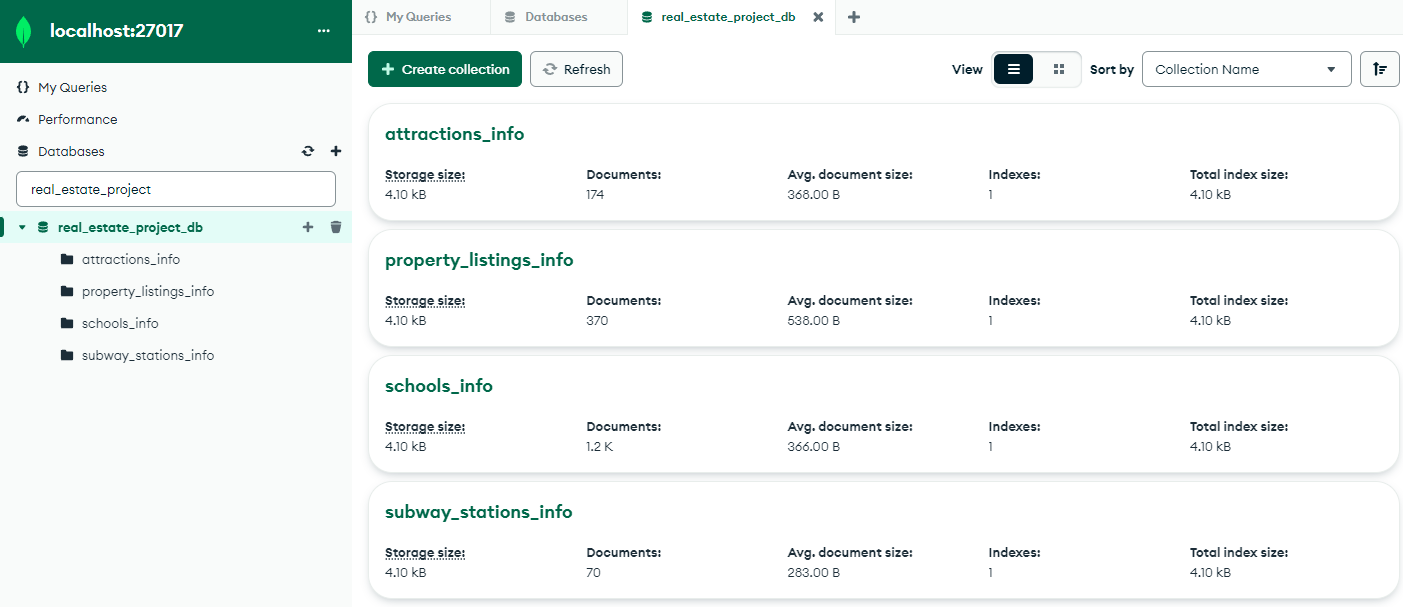